# Implementation of neural network from scratch using NumPy

# EXAMPLE 1

https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import matplotlib.pyplot as plt1

DNN(Deep neural network) in a machine learning algorithm that is inspired by the way the human brain works. DNN is mainly used as a classification algorithm. In this article, we will look at the stepwise approach on how to implement the basic DNN algorithm in NumPy(Python library) from scratch.

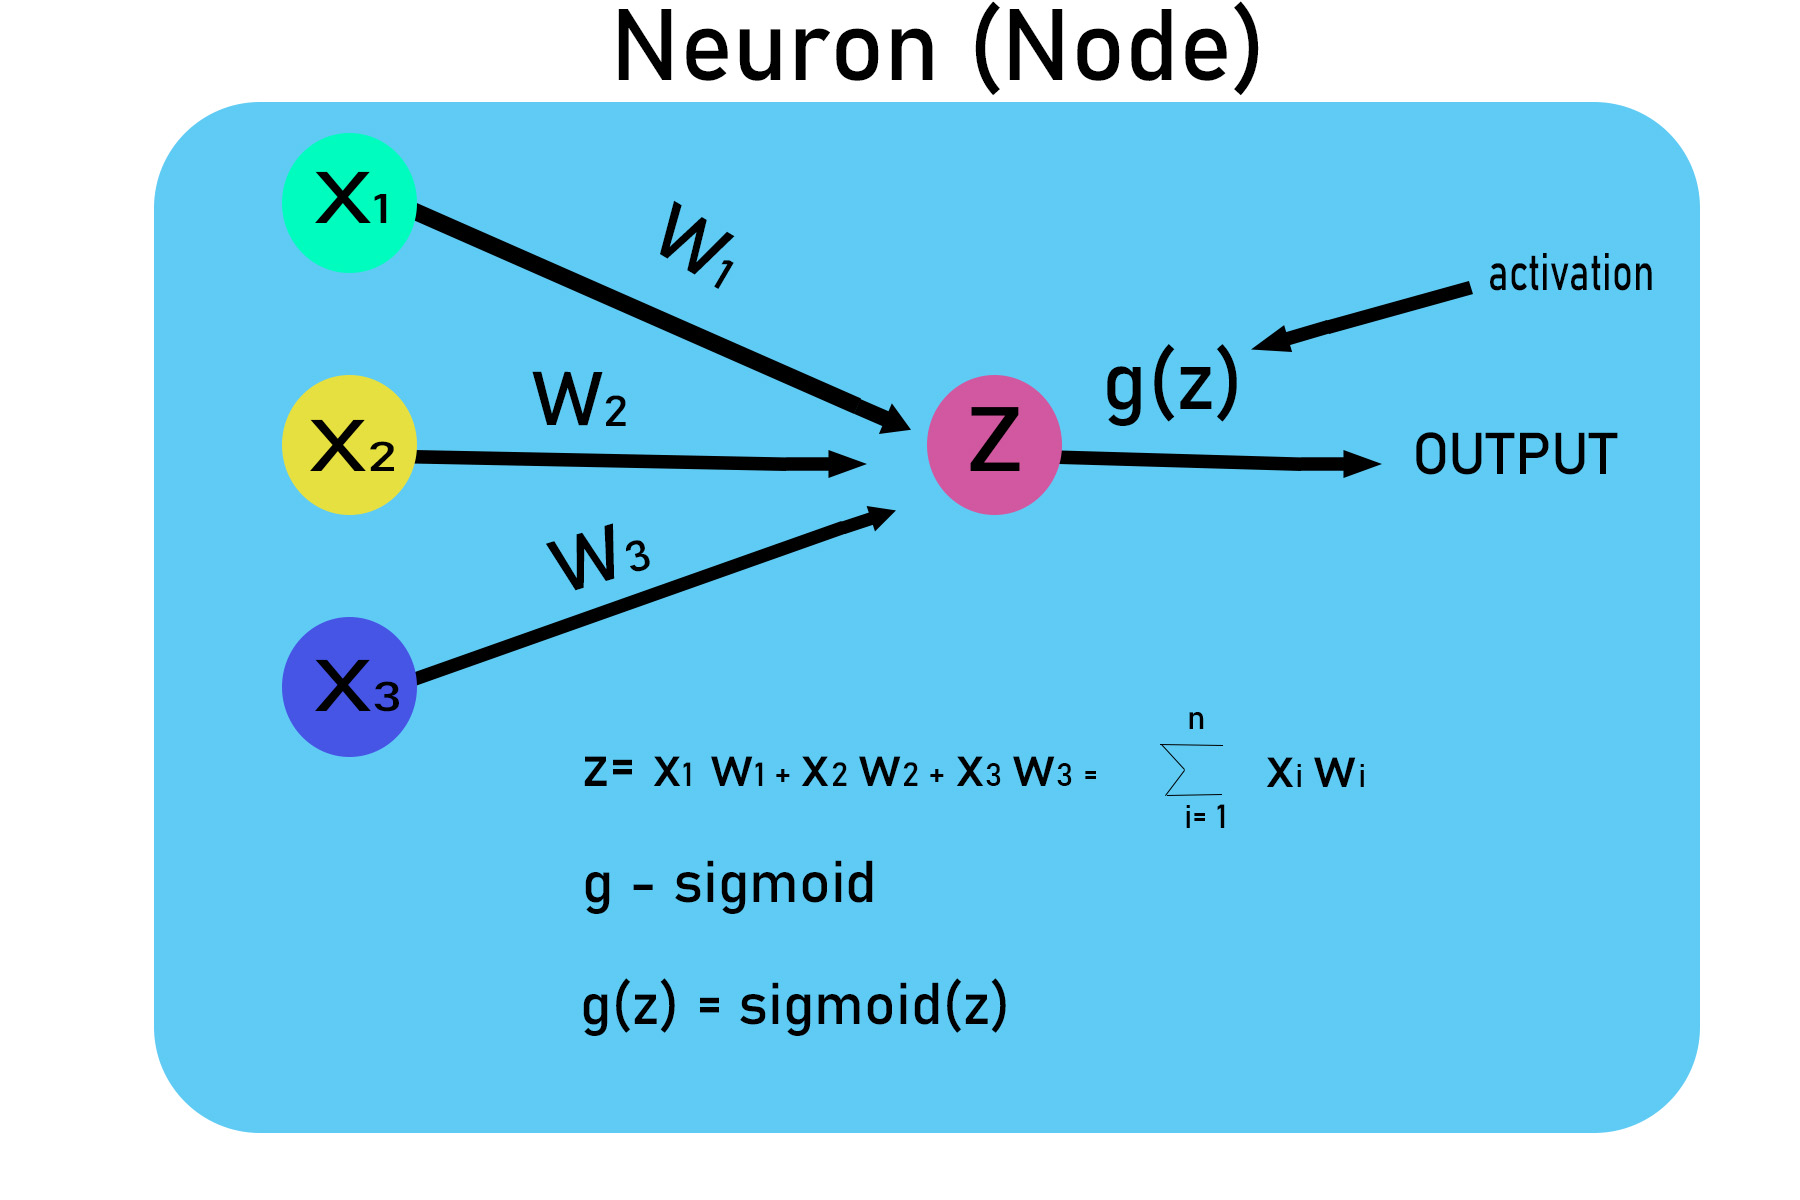

In [2]:
display.Image("./neuron.jpg")

## Step 1 : Creating the data set using numpy array of 0s and 1s.

As the image is a collection of pixel values in matrix, we will create those matrix of pixel for A, B, C

In [3]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]

# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]

# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


## Step 2 : Visualization of data set

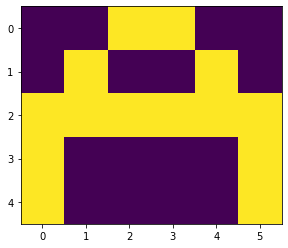

In [4]:
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

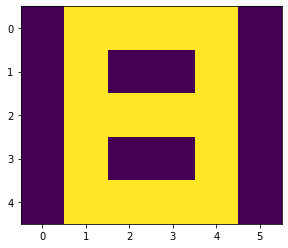

In [5]:
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

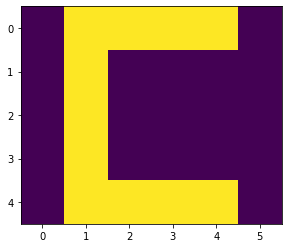

In [6]:
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

## Step 3: As the data set is in the form of list we will convert it into numpy array.

In [7]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x = [np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Step 4 : Defining the architecture or structure of the deep neural network. 
This includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure.

In [36]:
#display.Image("./nn.jpg")

# Step 5: Declaring and defining all the  functions to build deep neural network.

### 5.1 Activation function

In [9]:
# activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

### 5.2 Neural network creation

In [10]:
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# out put of layer 2
    
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)

### 5.3 Initializing the weights

In [11]:
# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

### 5.4 Loss

In [12]:
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

### 5.5 Back propagation of error

In [13]:
# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
    
    # hiden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
    
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1-a1)))
    
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
    return(w1, w2)

### 5.6 Train

In [14]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

### 5.7 Predict

In [15]:
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(out[0])):
        if(maxm < out[0][i]):
            maxm = out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()

## Step 6: Initializing the weights
Since the neural network has 3 layers, so there will be 2 weight matrix associate with it. The size of each matrix depends on the number of nodes in two connecting layers.

In [16]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.90775907  1.42837219  0.48590803  0.59456633  0.22691913]
 [-0.54653371 -0.32842973 -0.73505443  0.32000229 -0.40917688]
 [-0.23120362  0.21031583  0.27886984  0.52078198 -0.49873546]
 [-1.02323933  0.17455075  0.31001739 -1.66855024 -1.70665761]
 [-1.01865259 -1.18466425 -0.47428406  1.07701324  2.54631014]
 [-1.32218174 -0.11712787 -0.96269535  0.05127935 -0.32370601]
 [-2.37183177  0.59472131  0.80857945 -0.16234853 -0.47662593]
 [ 0.77922925  0.32877258 -1.19304476  0.77021393  0.61106296]
 [-1.04046491  1.49544748 -0.3756417  -1.00745101 -0.13215832]
 [-0.72036173 -0.08426892  0.50489907 -0.1896226   2.3433752 ]
 [ 2.20213508 -1.16038748  0.12263079  0.54076698 -0.09547899]
 [ 1.28810997  0.65624485  1.10509177  1.4522818  -2.72466927]
 [ 0.68293611 -0.14131307  0.74044005  0.7923617  -1.55716255]
 [ 0.682015   -0.56848593 -0.52754337 -0.0049836   0.56789942]
 [ 2.93199781  0.92670781  0.09183815 -0.22488724 -0.31467814]
 [-0.74682941 -1.03627036  0.07260005 -1.52216146  0.51

## Step 7 : Training the model.

In [17]:
"""The arguments of train function are: 
- data set list x, 
- correct labels y, 
- weights w1, w2, 
- learning rate = 0.1, 
- no of epochs or iteration.
The function will return the matrix of accuracy and loss 
and also the matrix of trained weights w1, w2"""
  
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 77.77403518106347
epochs: 2 ======== acc: 78.89527330887529
epochs: 3 ======== acc: 79.88780741481544
epochs: 4 ======== acc: 80.7743335554093
epochs: 5 ======== acc: 81.5764618484771
epochs: 6 ======== acc: 82.31271932238364
epochs: 7 ======== acc: 82.99774398089832
epochs: 8 ======== acc: 83.64234818501292
epochs: 9 ======== acc: 84.25410901235341
epochs: 10 ======== acc: 84.83814898060737
epochs: 11 ======== acc: 85.39786720211764
epochs: 12 ======== acc: 85.93551323799285
epochs: 13 ======== acc: 86.45259473869768
epochs: 14 ======== acc: 86.9501537474197
epochs: 15 ======== acc: 87.42895149843758
epochs: 16 ======== acc: 87.88959147726122
epochs: 17 ======== acc: 88.33259986759838
epochs: 18 ======== acc: 88.75847563434195
epochs: 19 ======== acc: 89.16771881719922
epochs: 20 ======== acc: 89.56084361026201
epochs: 21 ======== acc: 89.93838144444
epochs: 22 ======== acc: 90.30087812970021
epochs: 23 ======== acc: 90.64888804884184
epochs: 24 ======== acc: 9

# Step 8 : Plotting the  graphs of loss and accuracy with respect to number of epochs(Iteration).

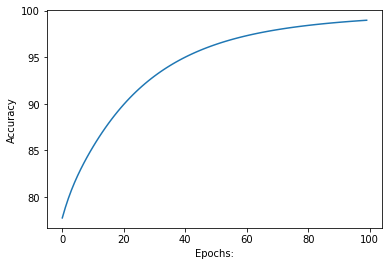

TypeError: float() argument must be a string or a number, not 'function'

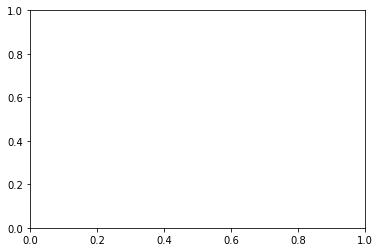

In [18]:
# ploting accuraccy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
  
# plotting Loss
plt1.plot(loss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [19]:
# the trained weigths are
print(w1, "\n", w2)

[[-0.90775907  1.42837219  0.48590803  0.59456633  0.22691913]
 [-0.77232776 -0.09382982 -0.73354839  0.34338439 -0.19447634]
 [-0.45458954  0.39102466  0.26464594  1.01456094 -0.6588531 ]
 [-1.24662525  0.35525957  0.29579349 -1.17477128 -1.86677525]
 [-1.24444665 -0.95006434 -0.47277802  1.10039534  2.76101067]
 [-1.32218174 -0.11712787 -0.96269535  0.05127935 -0.32370601]
 [-2.37183177  0.59472131  0.80857945 -0.16234853 -0.47662593]
 [ 0.55584333  0.50948141 -1.20726866  1.26399289  0.45094532]
 [-1.04046491  1.49544748 -0.3756417  -1.00745101 -0.13215832]
 [-0.72036173 -0.08426892  0.50489907 -0.1896226   2.3433752 ]
 [ 2.55738729 -1.01991464  0.1082169   0.3576171  -0.22921018]
 [ 1.28810997  0.65624485  1.10509177  1.4522818  -2.72466927]
 [ 0.68534425 -0.19520415  0.72471011  1.26275855 -1.93198073]
 [ 0.45862908 -0.3877771  -0.54176727  0.48879536  0.40778178]
 [ 3.28725001  1.06718065  0.07742427 -0.40803713 -0.44840932]
 [-0.3915772  -0.89579752  0.05818616 -1.70531134  0.38

# Step 9: Making prediction.

Image is of letter B.


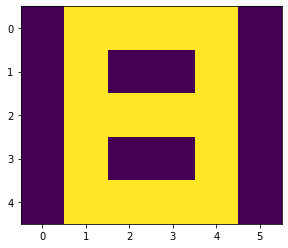

In [20]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)

#################################################################################################################

# EXAMPLE 2

from https://towardsdatascience.com/neural-net-from-scratch-using-numpy-71a31f6e3675 and 

https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb

In [21]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

For this task I am generating a dataset using the scikit learn dataset generator make_gaussian_quantiles function (Generate isotropic Gaussian and label samples by quantile). Generated input dataset will have have two features (‘X1’ and ‘X2’ and output ‘Y’ will have 2 classes (red: 0, blue:1), with total of 200 examples.

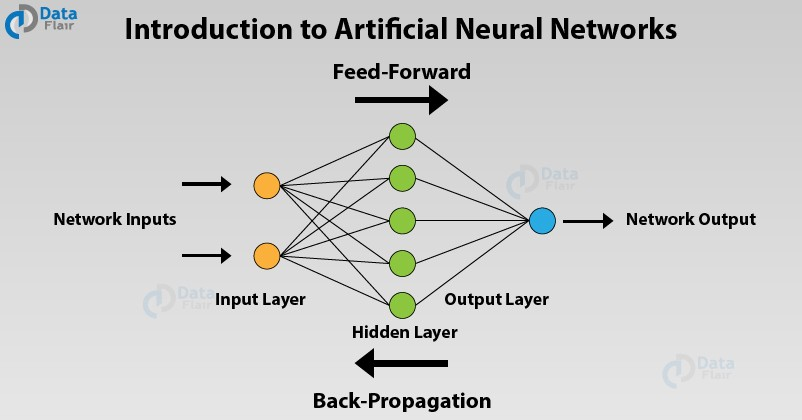

In [22]:
display.Image("./neu_net.jpeg")

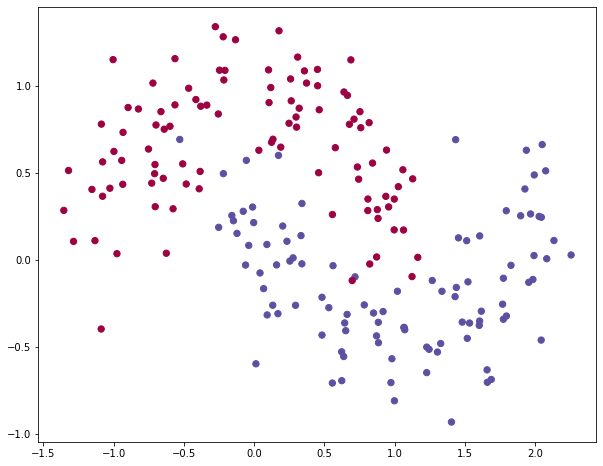

In [23]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

The dataset generated has two classes, plotted as red and blue points. 

Our goal is to build a Machine Learning classifier that predicts the correct class given the X- and Y- coordinates. 

As we can see in the graph, data is not linearly separable, so we can’t draw a straight line that separates the two classes. This means that linear classifiers such as Logistic Regression, won’t be able to fit these kind of data properly. In these cases nn comes to our rescue. In nn feature engineering is not required, as hidden layers will automatically learn feature patterns to classifies the data accurately.

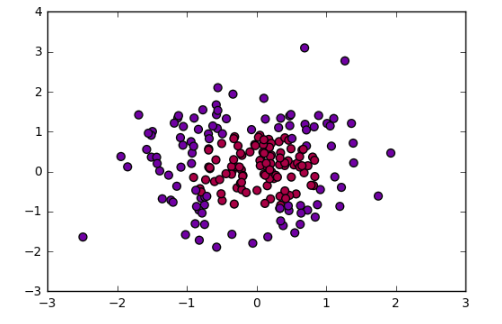

In [24]:
display.Image("dots.png")

## Logistic Regression (LR)

First lets train a LR classifier using the inputs x- and y-values and the output will be the predicted class (0 or 1). We will use the Regression class from scikit-learn

In [25]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [26]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

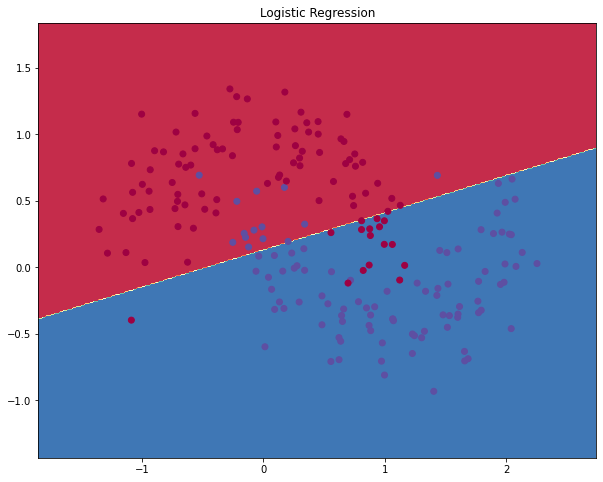

In [27]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [28]:
LR_predictions = clf.predict(X)
#print(LR_predictions)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y, LR_predictions) + 
        np.dot(1-y, 1-LR_predictions))/float(y.size)*100) +'% ' + 
       "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 85 % (percentage of correctly labelled datapoints)


### We need to do the below steps to build our nn model.

1. Define Network structure ( # of input units, # of hidden units, etc).
2. Initialise the model’s parameters
3. Perform the below steps in loop until we get minimum cost/optimal parameters.
4. Implement forward propagation
5. Compute loss
6. Implement backward propagation to get the gradients
7. Update parameters
8. Then merge all the above steps into one function we call `nn_model()`.

Once we built `nn_model()` and learnt the right parameters,we can make predictions on new data.

## Training a Neural Network

Let's now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. 

The number of nodes in the input layer is determined by the dimensionality of our data, 2. 

Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. (Because we only have 2 classes we could actually get away with only one output node predicting 0 or 1, but having 2 makes it easier to extend the network to more classes later on). 

The input to the network will be x- and y- coordinates and its output will be two probabilities, one for class 0 ("female") and one for class 1 ("male"). 



We can choose the dimensionality (the number of nodes) of the hidden layer. The more nodes we put into the hidden layer the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more prone to overfitting our data.







How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. We will play with the number of nodes in the hidden layer later on and see how it affects our output.

We also need to pick an activation function for our hidden layer. The activation function transforms the inputs of the layer into its outputs. A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are tanh, the sigmoid function, or ReLUs. We will use tanh, which performs quite well in many scenarios. A nice property of these functions is that their derivate can be computed using the original function value. For example, the derivative of $\tanh x$ is $1-\tanh^2 x$. This is useful because it allows us to compute $\tanh x$ once and re-use its value later on to get the derivative.

Because we want our network to output probabilities the activation function for the output layer will be the softmax, which is simply a way to convert raw scores to probabilities. If you're familiar with the logistic function you can think of softmax as its generalization to multiple classes.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### 1. Define Network Structure: 
As mentioned earlier, for input layer number of nodes will be 2, and for hidden layer i set it to 4. By choosing more nodes in this layer, we can make model learn complex functions. But it comes at a cost of heavy computation to make predictions and learn the network parameters. More number of hidden layers and nodes could also lead to over-fitting of our data.


### 2. Initialize the model’s parameters: 
W1 (weight matrix for hidden layer) and W2(wight matrix for output layer) parameters are initialized randomly using the numpy random function. Multiplied by 0.01 as we do not want the initial weights to be large, because it will lead to slower learning. b1 and b2 are initialized to zeros.
W1 — weight matrix of shape (n_h, n_x) for hidden layer
b1 — bias vector of shape (n_h, 1)
W2 — weight matrix of shape (n_y, n_h) for output layer
b2 — bias vector of shape (n_y, 1)


### 3. Forward Propagation: 
During forward propagation the input feature matrix is fed to the every neuron in the hidden layer. Which will be multiplied by the respective initial set of weights(W1) and bias(b1) will be added to form Z1 matrix (linear transformations of the given inputs). Then we apply the non-linearity to Z1 by feeding it through an activation function (to apply non-linearity). We chose ‘tanh’ as our activation function as it fits to many scenarios. The output of this activation function/hidden layer will be A1 (which is a matrix of size (4,1) contains the activations from the 4 neurons i.e a1, a2, a3 a4).



For the next layer which is the final output layer in our case, we multiply the inputs from the previous layer (A1) with the initial weights of output layer(W2), add bias(b2) to form Z2. Then apply the sigmoid activation function on Z2 to produce out final output A2 (which is our predictions). We used sigmoid for our final layer as we want our output to be between 0 and 1. Based on the probability threshold we can decide weather the output is red or blue. This is how nn makes predictions during forward propagation, which is just a sequence of matrix multiplications and application of activation function(s).


### 4. Compute Loss: 
Now that we have our predictions, next step would be to check how much our predictions differ from the actual values, i.e loss/error. Here we do not use mean square error (MSE) to compute our loss as our prediction function is non-linear(sigmoid). Squaring the prediction will results in non-convex function with many local minimums. In such case gradient descent many not find the optimal global minimum. Hence we use the binary Cross_Entropy loss (log-likelihood method for error estimate), this cost function is convex in nature, so reaching the global minimum point (minimum loss point) will be easier. Below is the cost function formula and the code.


### 5. BackPropagation/Gradient Descent (GD): 
Back propagation is used to calculate the gradients(slope/derivatives) of the loss function with respect to the model parameters(w1,b1,w2,b2). To minimize our cost we use the GD algorithm, which uses the computed gradients to update the parameters so that the our cost keeps reducing over iterations, i.e it help move towards global minimum.



### 6. Update the parameters: 
Once we have computed our gradients, we multiply them with a factor called learning-rate (converging rate) and subtract from the initial parameters to get the updated parameters(weights and biases). Learning rate should be minimal so that we will not miss the global minimum point.
Multiply the gradients by learning rate
Subtract from weights



Now we have performed one round of forward propagation and backward propagation for all the training examples, i.e we completed 1 epoch. We need to repeat these steps over multiple epochs till our cost is minimum(model reaches global minimum point)or the learning stops (no updates to the parameters).



Below is the function ‘nn_model’ which performs all the above operations repeatedly over a given number of epochs(num_iterations) and prints the cost after every 1000 epochs. The output of this function will be the final set of optimised parameters(weights/baiases).


### 7. Predictions: 
Below is the function which makes prediction using the learned parameters, by doing just a forward propagation. We are setting a threshold as 0.5, if the output of the final layer (A2) is > 0.5 then we are classifying it as 1:blue else 0:red.


Tuning the Hidden Layer size: Next step would be to decide the optimal number of neurons for the hidden layer to see if our model can do better without over-fitting. For this lets train the model with different number of nodes (1,2,3,4,5,20,50) and see the results.

## How our network makes predictions

Our network makes predictions using forward propagation, which is just a bunch of matrix multiplications and the application of the activation function(s) we defined above. If $x$ is the 2-dimensional input to our network then we calculate our prediction $\hat{y}$ (also two-dimensional) as follows:

$$
\begin{aligned}
z_1 &amp; = xW_1 + b_1 \\
a_1 &amp; = \tanh(z_1) \\
z_2 &amp; = a_1W_2 + b_2 \\
a_2 &amp; = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

$z_i$ is the weighted sum of inputs of layer $i$ (bias included) and $a_i$ is the output of layer $i$ after applying the activation function. $W_1, b_1, W_2, b_2$ are parameters of our network, which we need to learn from our training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 500 nodes for our hidden layer then $W_1 \in \mathbb{R}^{2\times500}$, $b_1 \in \mathbb{R}^{500}$, $W_2 \in \mathbb{R}^{500\times2}$, $b_2 \in \mathbb{R}^{2}$. Now you see why we have more parameters if we increase the size of the hidden layer.

2. Initialize the model’s parameters: W1 (weight matrix for hidden layer) and W2(wight matrix for output layer) parameters are initialized randomly using the numpy random function. Multiplied by 0.01 as we do not want the initial weights to be large, because it will lead to slower learning. b1 and b2 are initialized to zeros.
W1 — weight matrix of shape (n_h, n_x) for hidden layer
b1 — bias vector of shape (n_h, 1)
W2 — weight matrix of shape (n_y, n_h) for output layer
b2 — bias vector of shape (n_y, 1)

## Learning the Parameters



Learning the parameters for our network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on our training data. But how do we define the error? We call the function that measures our error the loss function. A common choice with the softmax output is the cross-entropy loss. If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$
The formula looks complicated, but all it really does is sum over our training examples and add to the loss if we predicted the incorrect class. So, the further away $y$ (the correct labels) and $\hat{y}$ (our predictions) are, the greater our loss will be.






Remember that our goal is to find the parameters that minimize our loss function. We can use gradient descent to find its minimum. I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also decay the learning rate over time.

As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients we use the famous backpropagation algorithm, which is a way to efficiently calculate the gradients starting from the output. I won't go into detail how backpropagation works, but there are many excellent explanations (here or here) floating around the web.


Applying the backpropagation formula we find the following (trust me on this):

$$
\begin{aligned}
&amp; \delta_3 = \hat{y} - y \\
&amp; \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
&amp; \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
&amp; \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
&amp; \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
&amp; \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

## Implementation
Now we are ready for our implementation. We start by defining some useful variables and parameters for gradient descent:

In [30]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

First let's implement the loss function we defined above. We use this to evaluate how well our model is doing:

In [31]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.

In [32]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Finally, here comes the function to train our Neural Network. It implements batch gradient descent using the backpropagation derivates we found above.

In [33]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model        

## A network with a hidden layer of size 3

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.069033
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

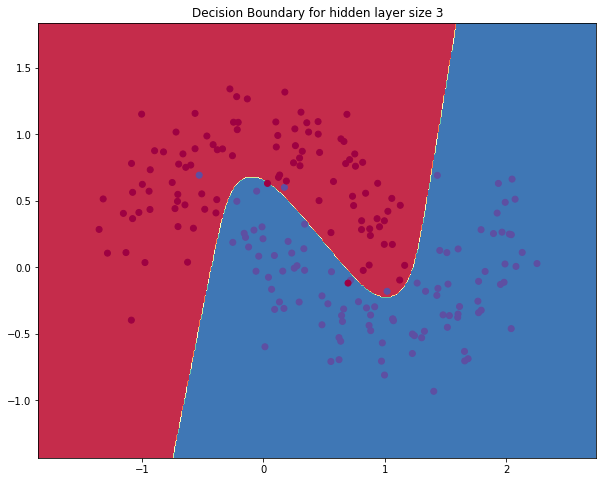

In [34]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

### Varying the hidden layer size

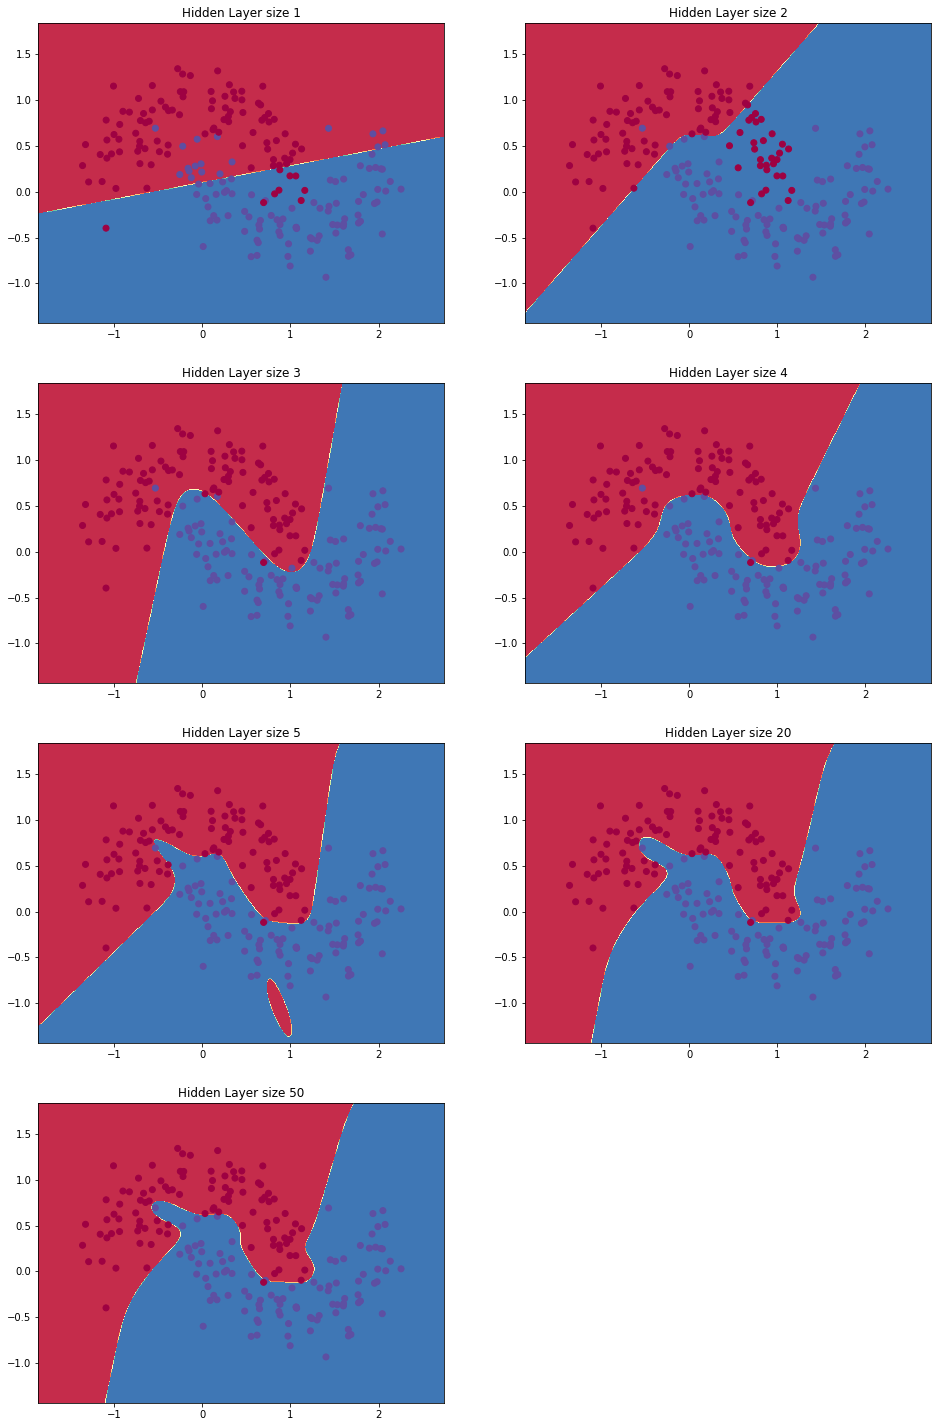

In [35]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

We can see that while a hidden layer of low dimensionality nicely capture the general trend of our data, but higher dimensionalities are prone to overfitting. They are "memorizing" the data as opposed to fitting the general shape. If we were to evaluate our model on a separate test set (and you should!) the model with a smaller hidden layer size would likely perform better because it generalizes better. We could counteract overfitting with stronger regularization, but picking the correct size for hidden layer is a much more "economical" solution.